<a href="https://colab.research.google.com/github/visiont3lab/machine_learning/blob/master/15-Clustering/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Links and Reference
* [Python Data Science HandBook Github](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Python Data Science HandBook Colab](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)
* [Kmeans Reference for this class](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb)
* [Kmeans Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* [Example implementation Kmeans numpy](https://flothesof.github.io/k-means-numpy.html)
* [DBSCAN slide spiegazione](http://staff.icar.cnr.it/manco/Teaching/2005/datamining/lezioni/lezione11.pdf)
* [Sklearn Clustering Come scegliere l'algoritmo di clustering giusto?](https://scikit-learn.org/stable/modules/clustering.html)
* [Kmeans from scratch tutorial](https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch)
* [Silohuette score explaination](https://www.youtube.com/watch?v=5TPldC_dC0s)

# Introduzione

Cosa faremo oggi? Clustering!

1. Overview clustering
2. Kmeans algoritmo
  * come funziona?
  * inizializzazione
  * hard clustering vs soft clustering
  * come si sceglie in il numero di clusters? Elbow method  vs silhouette coefficient
  * limiti
3. A cosa serve il clustering? Esempi utili
  * Clustering for Image Segmentation
  * Clustering for Preprocessing
  * Clustering for semi-supervised Learning
4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algoritmo 
5. Differenti opzioni disponibili di clustering (discussione)
6. Esempio pratico

# 1) Overview Clustering

Apprendimento non supervisionato. L'obbiettivo è strutturare i dati in base a qualcosa che essi hanno in comune senza avere una conoscenza a priopri di essi.

Se volessimo creare un classificatore binario capace di capire quando in un immagine c'è o  non c'è manuel dovremmo avere un dataset con immmagini di manuel e immagini di altre persone. Tuttavia avere immagini di tutte le persone del mondo è complicato e pertanto risulta più facile usare un algoritmo unsupervised (non supervisionato) cioè che non ha bisogno di labels (etichette). Pertanto  dato un dataset dove vi sono 100 immagini di manuel e 100 immagini di altre persone vogliamo costruire un algoritmo capace di raggruppare le immagini in manuel e non manuel senza avere le label associate alle immagini.

Obbiettivo è usare unlabeled data (dati non etichettati).

## Clustering Applications

### Che cosa si intende con il termine clustering?
* Clustering: raggruppare elementi "simili" dentro dei cluster (insiemi). 
> <cite> It is the task of identifying similar instances and assigning them to clusters, i.e., groups of similar instances. </cite>

### In che tipo di applicazione è utilite utilizzarlo?

* Anomaly detection: l'obbiettivo è imparare il significato di normale. Vogliamo essere in grado di distingure qualcosa che è normale da qualcosa che è anomalo. In particolare in questo campo sono molto utili algoritmi di clustering basati sulla densità (density estimation). Dove vi è una alta densità di dati avremo qualcosa che è "normale" mentre a areee di bassa densità corrisponderanno delle anomalie. 

* Image segmentation: l'obbiettivo è quello di semgmentare l'immagine in diverse parti basandoci sul colore. Il numero di colori (o numero di cluster) lo definiamo noi a priori. Per questo tipo di applicazionee algoritmi basati su centroid come Kmeans sono adatti in quanto partendo da un punto aggregano i punti ad esso vicino in base a una condizione.

* Preprocessing: Clustering può essere usato per capire quali elementi del dataset sono più importanti di altri. Per esempio se consideriamo il MNIST dataset esso e formato da 70000 immagini ed è diviso in 10 classi (0-9). Se volessimo ridurre il dataset mantenendo pù o meno lo stesso contenuto di informazioni potremmo usare la PCA ma anche il clustering. Infatti un algoritmo di clustering come il Kmeans con numero di cluster uguale a 50 ci ragruppa le immagini in 50 classi. Qundi adesso pescando 1 immagine a casa da queste 50 classi possiamo allenare il nostro classifier con 50 invece che 70000 immagini. In questo caso è imporntante essere sicuri che il numero di cluster scelta è ababstanza grande da avere una rappresentazione significativa del dataset.





* How to select the clusters 
The inertia is not a good
performance metric when trying to choose k since it keeps getting
lower as we increase k. Indeed, the more clusters there are, the closer
each instance will be to its closest centroid, and therefore the lower the
inertia will be. Elbow method.the silhouette score. ). The silhouette coefficient can
vary between -1 and +1: a coefficient close to +1 means that the
instance is well inside its own cluster and far from other clusters, while
a coefficient close to 0 means that it is close to a cluster boundary, and
finally a coefficient close to -1 means that the instance may have been
assigned to the wrong cluster. > from sklearn.metrics import silhouette_score> silhouette_score(X, kmeans.labels).
silhouette diagram

* kmeans limit
it is fast, scalable but we need to run it multiple times to avoid sub optimal solution and we need to set the cluster number. Kmeans does not behave well when cluster varying size., different densities or non spherical shapes.
So depending on the data,
different clustering algorithms may perform better. For example, on
these types of elliptical clusters, Gaussian mixture models work great.




# 2) Kmeans Algoritmo

Important:
> It is important to scale the input features before run kmeans otherwise the cluster might be very strectched. Rule of thumb it is to scale.


![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1)


Kmeans discussione:
* hard clustering: yes it belongs to the cluster or not, it does not.
* soft clustering: just give each instance a score per cluster. For example, the score can be the distance between the instance and the centroid or a similarity score( affinity).
* kmeans performance metric inertia. This is the mean squared distance between each instance and its closest centroid. The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia.
* sklearn kmeans uses K-means++ smarter initialization. It select centroids that are distant from one another.The KMeans class actually uses this initialization method by default. If
you want to force it to use the original method (i.e., picking k instances
randomly to define the initial centroids), then you can set the init
hyperparameter to "random". You will rarely need to do this. 

Limitazioni:
 * L'algoritmo K-Means non si comporta bene quando i dati sono raggruppati in gruppi di diametro diverso in quanto assegna un punto a un cluster basandosi soltanto sulla distanza che esso ha dal centroide. Non si comporta bene neanche quando  i dati hanno densità diverse o forme non sferiche.
 * È un algoritmo veloce e facilmente scalabile anche se è necessario farlo andare più volte al fine di eveitare soluzioni che sembrano ma non sono ottimali.È importante sottolineare che il l'inizializzazione (posizione iniziale dei centroid) del Kmeans avviene random e pertanto esso potrebbe condurre a soluzioni buone ma non ottimali. 

Conclusione:
> la forma dei dati, cioè come essi si distribuiscono nello spazio è fondamentale per determinare il tipo di clustering da usare.

### Implementazione

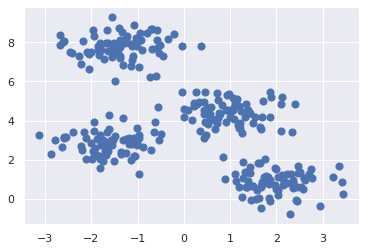

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

# Geta data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


#### Implentazione da zero

[[ -6.31161343  -2.97641697]
 [ -1.34052081   4.15711949]
 [-11.11418252  -3.87242145]
 [-10.72330962  -4.82111722]]


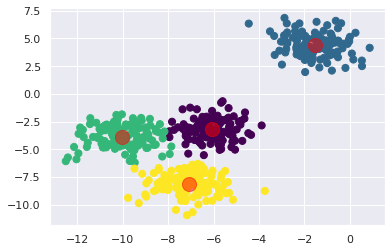

In [62]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    print(centers)
    
    while True:
        # 2a. Assign labels based on closest center
        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)


[[1.07627418 4.68480619]
 [2.47019077 1.31451315]
 [1.24258802 4.50399192]
 [2.5270643  0.6178122 ]]


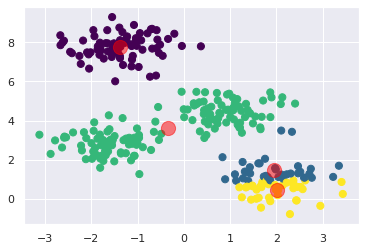

In [42]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Importante:
> È importante sottolineare che il risultato ottimale non è garantito. Infatti esso vi sono diverse soluzione che sub ottimali ma non ottimali come quella mostrata nella figura in alto. Pertanto è necessario ripetere la procedura di  E-M (Expectation Maximization)  diverse volte con diverse inizializzazioni dei centroidi. Scikit-Learn di default ha un parametro chiamato "n_init=10" che ha la funzionalità di definire quanto volte voglio ripetere l'algoritmo.

#### Implementazione sklearn

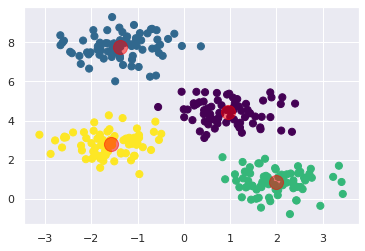

In [41]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Problema:
> Il numero di cluster deve essere scelto a priori. È necessario a priori avere una conoscenza di in quante parti si vuole dividere il dataset. L'algoritmo di Kmeans non è in grado di calcolarsi il numero di clusters usando il dataset stesso.

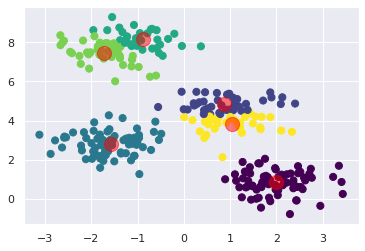

In [46]:
kmeans = KMeans(6, random_state=0)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Come scegliamo il numero giusto di clusters?

> Che cosa usiamo come unità di misura per capire quanto i cluster creati sono "buoni"?
* Elbow method
* Silhouette analysis.


### Elbow method
* Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
* Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [85]:
# Sum of squared distance (Inertia)
sqd = 0
for i in range(0,len(centers)):
  dist = np.linalg.norm(X - centers[i,:],2)  # Euclidean distance
  sqd = dist + sqd
print(sqd/len(centers))

170.85249074020126


In [71]:
kmeans.inertia_

170.72930303135

In [72]:
# Score è lo stesso dell'inertia
kmeans.score(X,centers)

-170.72930303135018

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
k = 4 # number of clusters
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
    
    distortions.append(sum(np.min(pairwise_distances(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(pairwise_distances(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

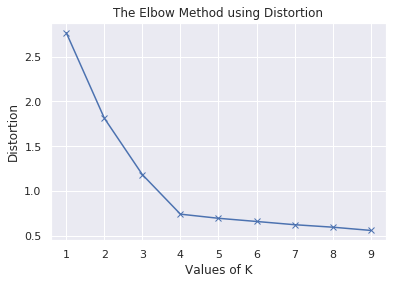

In [67]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

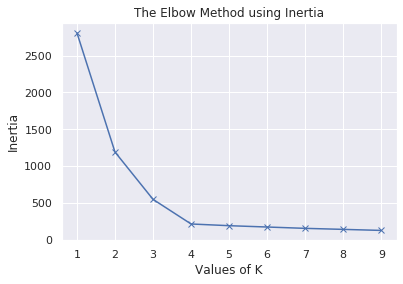

In [68]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

### Silhouette analysis
Given two cluster 1 and 2 we define a as the average distance between all the points belonging to class 1 and its centroid whereas b is the distance between the average distance  between the centroid of a  and the points b of the cluster

Formula = (b-a)/max(a,b)



> The silhouette_score gives the average value for all the samples.
This gives a perspective into the density and separation of the formed clusters

The silhouette coefficient can
vary between -1 and +1: a coefficient close to +1 means that the
instance is well inside its own cluster and far from other clusters, while
a coefficient close to 0 means that it is close to a cluster boundary, and
finally a coefficient close to -1 means that the instance may have been
assigned to the wrong cluster

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


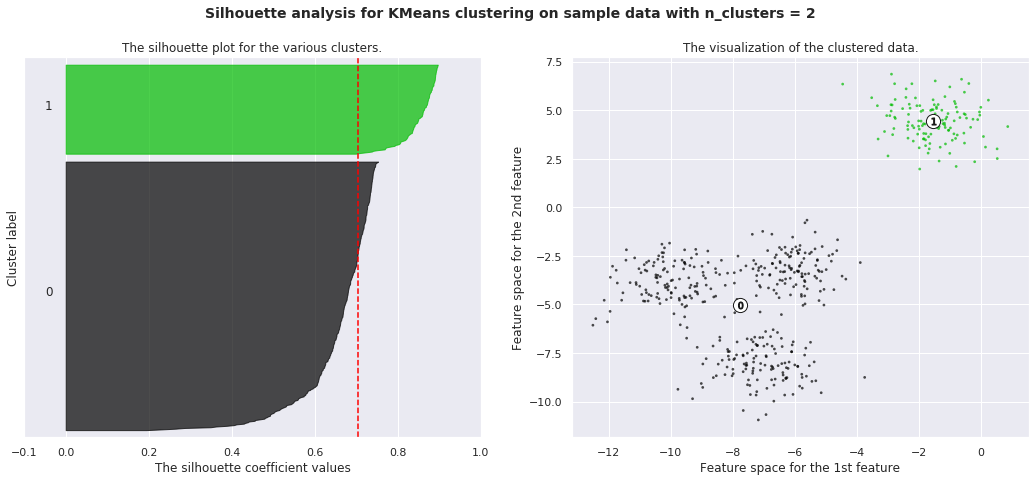

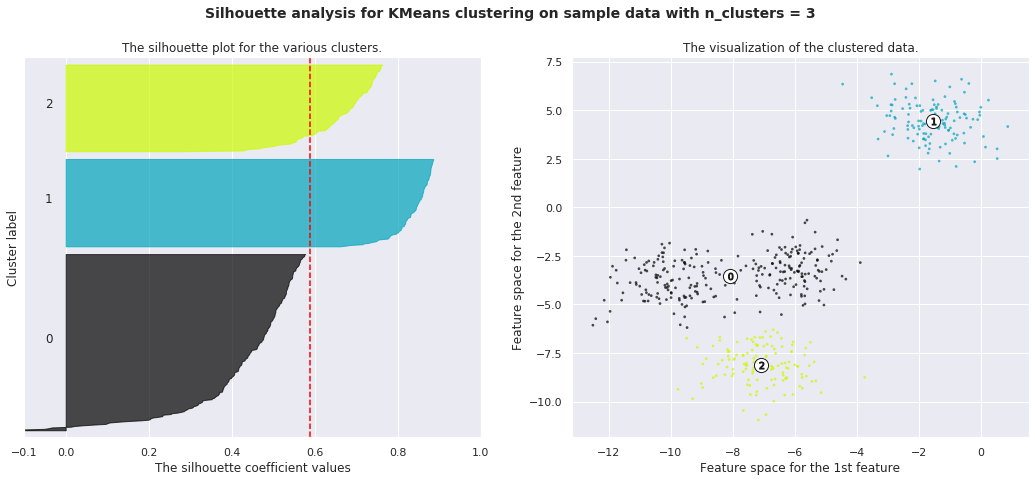

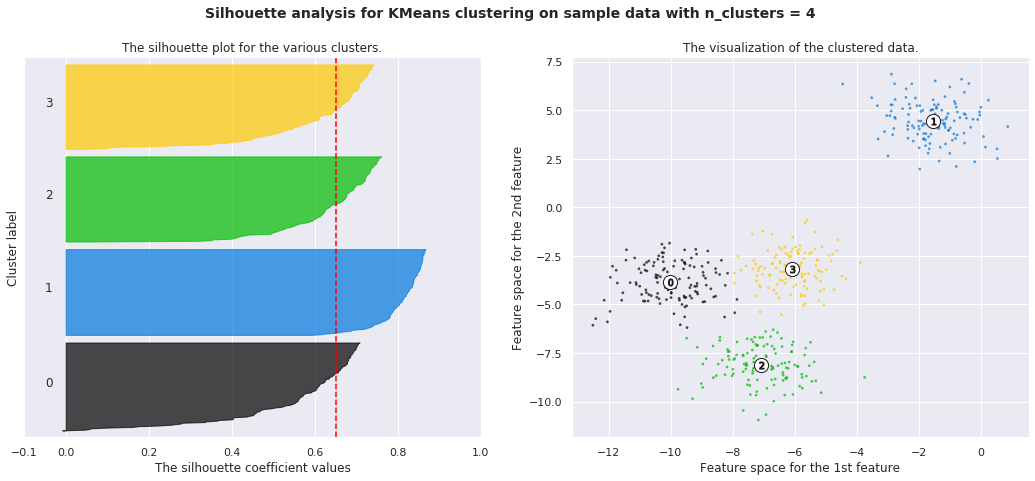

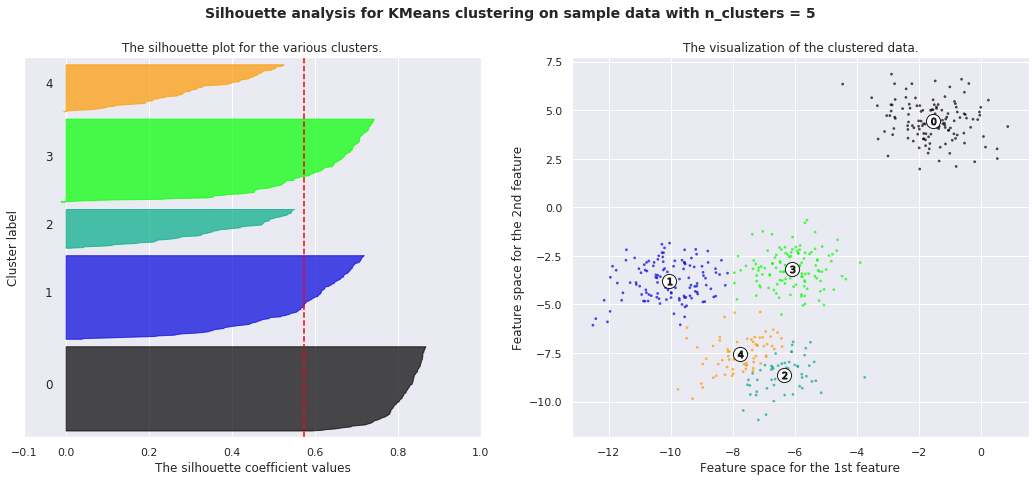

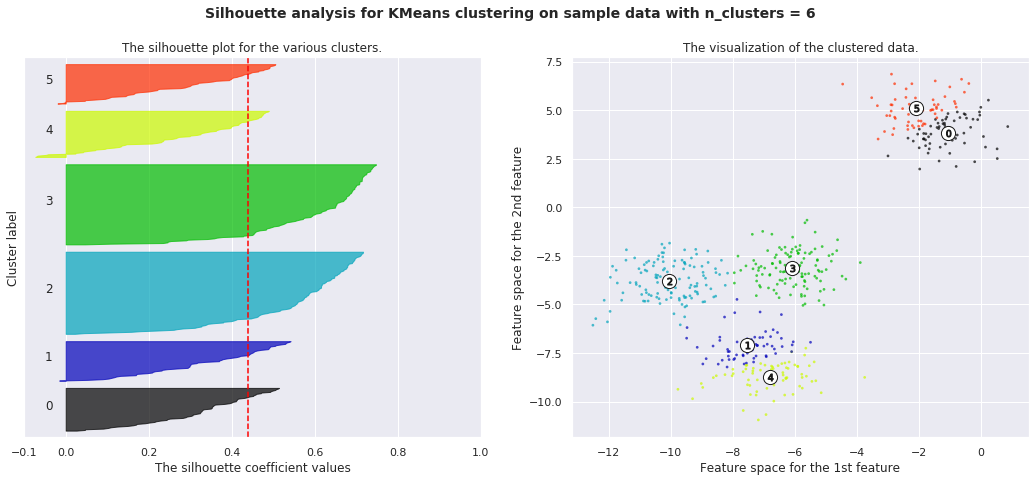

In [60]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Spectral clustering vs Kmeans

Importante: Problema Kmeans: Esso è limitato a boundaries lineari
> L'algoritmo kmeans si basa sulla vicinanza che i punti hanno rispetto al centroide trovato o scelto. Pertanto esso non generalizza bene quando i cluster hanno geometrie particolari. Inoltre i cluster sarranno divisi da boundaries lineari.


Nota: 
> <cite> SpectralClustering uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. This will alllow to achieve higher dimensionality and generalize better. </cite>

In [0]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


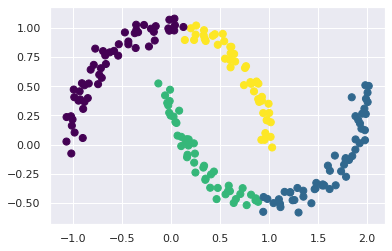

In [58]:
# Spectral clustering
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

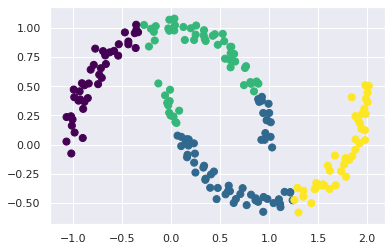

In [59]:
# Kmeans clustering
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

# 3) Clustering for Image Segmentation
Divide image into multiple segment (color segmentation). We will collect pixel having the same color. 

Importnat: K-Means prefers clusters of similar size

In [0]:
from google.colab import files
from io import BytesIO
from PIL import Image
uploaded = files.upload()


Saving selfie.jpg to selfie.jpg


In [0]:
name = list(uploaded.keys())
print(name)
im = np.array(Image.open(BytesIO(uploaded[name[0]])))

['selfie.jpg']


(1067, 1600, 3)
(1707200, 3)


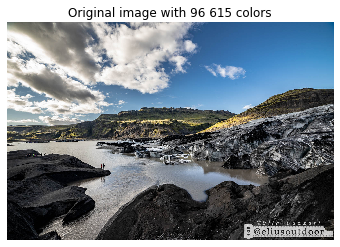

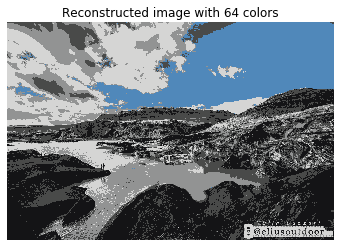

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

#im = load_sample_image('flower.jpg') # china.jpg
flower = np.array(im, dtype=np.float64) / 255
plt.imshow(im)
#plt.show()

print(im.shape) # (427,640,3)
w, h, d = original_shape = tuple(im.shape)
#print(w,h,d) # 427, 640, 3
#assert d == 3
image_array = np.reshape(flower, (w * h, d))
print(image_array.shape) # (273280,3)

# Setting  Kmeans
image_sample = shuffle(image_array, random_state=42)[:1000]
n_colors = 5
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)
#Get color indices for full image
labels = kmeans.predict(image_array)

# Plots
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96 615 colors')
plt.imshow(im)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Reconstructed image with 64 colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))
plt.show()


# 4) Clustering for Preprocessing
We have seen PCA (dimensionality reduction).

Although it is tempting to define the number of clusters to 10, since
there are 10 different digits, it is unlikely to perform well, because there
are several different ways to write each digit

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test =train_test_split(X_digits, y_digits)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)                

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9666666666666667

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
pipeline = Pipeline([
  ("kmeans", KMeans(n_clusters=50)),
  ("log_reg", LogisticRegression()),
  ])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9555555555555556

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3,verbose=1)
grid_clf.fit(X_train, y_train)


In [0]:
print(grid_clf.best_params_)
grid_clf.score(X_test, y_test)

{'kmeans__n_clusters': 58}


0.9577777777777777

# 5) Clustering for semi-supervised Learning
Another use case for clustering is in semi-supervised learning, when
we have plenty of unlabeled instances and very few labeled instances.

Since it is often costly and
painful to label instances, especially when it has to be done manually
by experts, it is a good idea to label representative instances rather than
just random instances

In [0]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8622222222222222

First, let’s cluster the training set
into 50 clusters, then for each cluster let’s find the image closest to the
centroid. We will call these images the representative images.

In [0]:
import numpy as np
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist,axis=0)
X_representative_digits = X_train[representative_digit_idx]

# Code to manually label the image (we need to implement it.)

Now let’s look at each image and manually label it:
y_representative_digits = np.array([4, 8, 0, 6, 8, 3, .. 7, 6, 2, 3, 1, 1]).

After having manually label them let's train a classifier.



In [0]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test =train_test_split(X_representative_digits, y_digits)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)                


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9666666666666667

label propagation

In [0]:
y_train_propagated = np.empty(len(X_train),dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

We got a tiny little accuracy boost. Better than nothing, but not
astounding. The problem is that we propagated each representative
instance’s label to all the instances in the same cluster, including the
instances located close to the cluster boundaries, which are more likely
to be mislabeled. Let’s see what happens if we only propagate the
labels to the 20% of the instances that are closest to the centroids:

In [0]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated =
X_train[partially_propagated]
y_train_partially_propagated =
y_train_propagated[partially_propagated]

log_reg = LogisticRegression()
>>> log_reg.fit(X_train_partially_propagated,
y_train_partially_propagated)
>>> log_reg.score(X_test, y_test)
0.9422222222222222
Nice! With just 50 labeled instances (only 5 examples per class on
average!), we got 94.2% performance, which is pretty close to the
performance of logistic regression on the fully labeled digits dataset
(which was 96.7%). This is because the propagated labels are actually
pretty good, their accuracy is very close to 99%:
>>> np.mean(y_train_partially_propagated ==
y_train[partially_propagated])
0.9896907216494846


To continue improving your model and your training set, the next step could be to do a few rounds of
active learning: this is when a human expert interacts with the learning algorithm, providing labels
when the algorithm needs them. There are many different strategies for active learning, but one of the
most common ones is called uncertainty sampling:
The model is trained on the labeled instances gathered so far, and this model is used to
make predictions on all the unlabeled instances.
The instances for which the model is most uncertain (i.e., when its estimated probability is
lowest) must be labeled by the expert.
Then you just iterate this process again and again, until the performance improvement stops
being worth the labeling effort.
Other strategies include labeling the instances that would result in the largest model change, or the
largest drop in the model’s validation error, or the instances that different models disagree on (e.g., an
SVM, a Random Forest, and so on).


# 6) DBSCAN Algoritmo
local density estimation. It allows to identify clusters of arbitraty shapes. This algorithm defines clusters as continuous regions of high density.
This algorithm works well if all the clusters are dense enough, and they
are well separated by low-density regions.

* For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood. 

* If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a coreinstance. In other words, core instances are those that are located in dense region.

* All instances in the neighborhood of a core instance belong to the same cluster. This may include other core instances,
therefore a long sequence of neighboring core instances forms
a single cluster.

* Any instance that is not a core instance and does not have one
in its neighborhood is considered an anomaly.

In short, DBSCAN is a very simple yet powerful algorithm, capable ofidentifying any number of clusters, of any shape, it is robust to outliers,and it has just two hyperparameters (eps and min_samples).However, if the density varies significantly across the clusters, it can beimpossible for it to capture all the clusters properly. Moreover, itscomputational complexity is roughly O(m log m), making it prettyclose to linear with regards to the number of instances. 


In [86]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)


DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

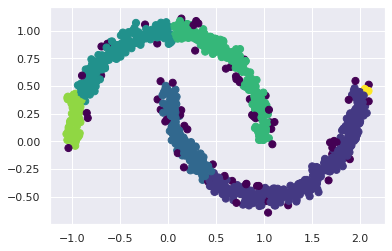

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_,
            s=50, cmap='viridis');

# 7) Other clustering algorithms

* Agglomerative clustering: . It can scale nicely to large numbers of
instances if you provide a connectivity matrix. This is a sparse
m by m matrix that indicates which pairs of instances are
neighbors (e.g., returned by
sklearn.neighbors.kneighbors_graph()).

* Mean shift: can find cluster of any shape. it has just one hyperparameter (radius of the circle bandwidth). it relys on local density estimation. It can recognize shape but we need same density. Not suited for large dataset. Same type of DBSCAN.

* Affinity propagation: voting system

* Spectral
clustering can capture complex cluster structures, and it can
also be used to cut graphs (e.g., to identify clusters of friends
on a social network), however it does not scale well to large
number of instances, and it does not behave well when the
clusters have very different sizes.

# 8) Example

## Example: Electrocardiogram Analysis

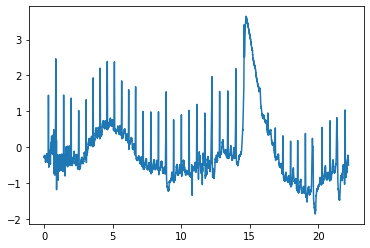

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.misc import electrocardiogram
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

ecg = electrocardiogram()[10000:18000]
#ecg = electrocardiogram()[17000:18000]

fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)


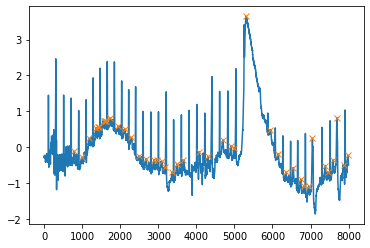

In [0]:
peaks, properties = find_peaks(ecg, width=20)
peaks
plt.plot(ecg)
plt.plot(peaks, ecg[peaks], "x")

(8000,)
(8000,)


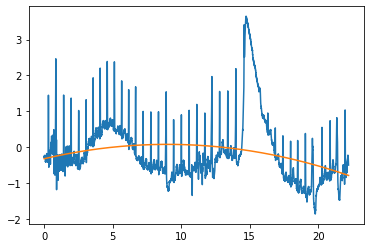

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
print(time.shape)
print(ecg.shape)
X_lr = time.reshape(-1, 1) 
y_lr = ecg.reshape(-1,1)
poly = PolynomialFeatures(2)
X_lr = poly.fit_transform(X_lr)
reg = LinearRegression().fit(X_lr, y_lr)
reg.score(X_lr, y_lr)
y_hat = reg.predict(X_lr)
plt.plot(time,ecg)
plt.plot(time,y_hat)

[3237] []
[3237]


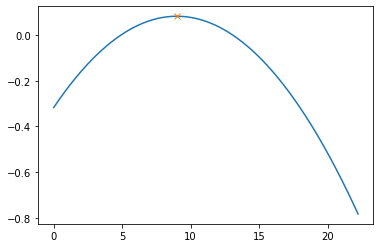

In [0]:
# find peaks
peaks_p, properties_p = find_peaks(y_hat.reshape(-1))
peaks_n, properties_n = find_peaks(-y_hat.reshape(-1))
print(peaks_p,peaks_n)
peaks = np.array(np.concatenate((peaks_p, peaks_n)))
print(peaks)
plt.plot(time.reshape(-1),y_hat.reshape(-1))
plt.plot(time.reshape(-1)[peaks], y_hat.reshape(-1)[peaks], "x")

[   0 1999 3999 5999 7999]


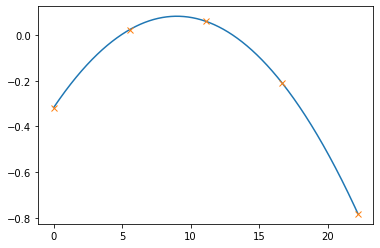

In [0]:
# split line into n segments
peaks = np.linspace(0,len(y_hat.reshape(-1))-1,5, dtype=int) 
print(peaks)
plt.plot(time.reshape(-1),y_hat.reshape(-1))
plt.plot(time.reshape(-1)[peaks], y_hat.reshape(-1)[peaks], "x")

[   0 1999 3999 5999 7999]
[[ 0.         -0.31766497]
 [ 5.55277778  0.02362275]
 [11.10833333  0.05991783]
 [16.66388889 -0.20902677]
 [22.21944444 -0.78321103]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


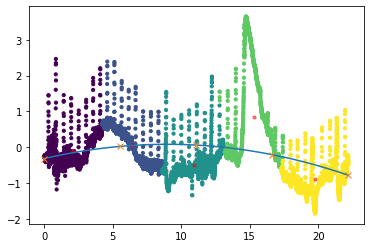

In [0]:
X = np.array([time,ecg]).T
print(peaks)
xx = time.reshape(-1)[peaks]
yy = y_hat.reshape(-1)[peaks]
c = np.array([xx,yy]).T
print(c)
kmeans = KMeans(n_clusters=len(peaks), init=c)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=10, alpha=0.5);
plt.plot(time.reshape(-1),y_hat.reshape(-1))
plt.plot(time.reshape(-1)[peaks], y_hat.reshape(-1)[peaks], "x")

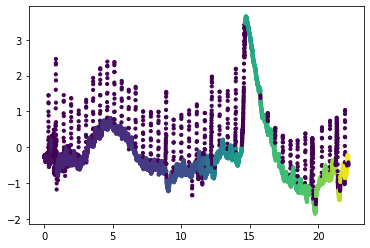

In [0]:
 from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=20).fit(X)
labels = clustering.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

Compute structured hierarchical clustering...


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 71 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Number of points: 1000


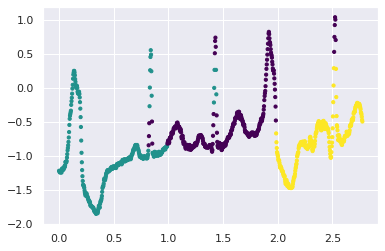

In [0]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py
# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
connectivity = kneighbors_graph(X, n_neighbors=2, include_self=False)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
ward = AgglomerativeClustering(n_clusters=3, connectivity=connectivity,
                               linkage='ward').fit(X)
label = ward.labels_
print("Number of points: %i" % label.size)
plt.scatter(X[:, 0], X[:, 1], c=label, s=10, cmap='viridis')

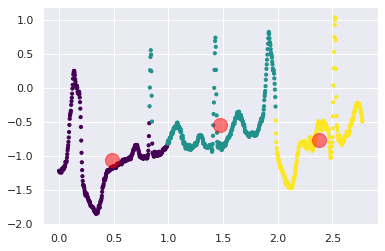

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

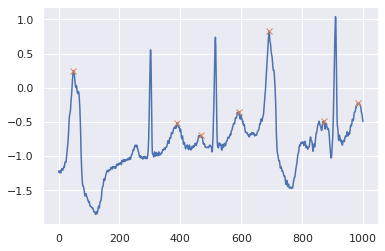

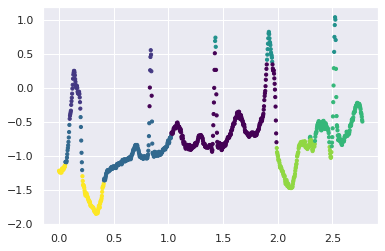

In [0]:

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=len(peaks), affinity='rbf',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

## Extra Example: k-means on digits

To start, let's take a look at applying *k*-means on the same simple digits data that we saw in [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb) and [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb).
Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *a priori* label information.

We will start by loading the digits and then finding the ``KMeans`` clusters.
Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [0]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

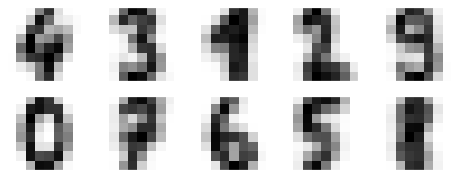

In [0]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in them:

In [0]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
Let's check the confusion matrix for this:

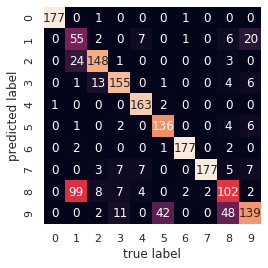

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!

Just for fun, let's try to push this even farther.
We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm (mentioned in [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)) to pre-process the data before performing *k*-means.
t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.
Let's see how it does:

In [0]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535

That's nearly 92% classification accuracy *without using the labels*.
This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to do by hand or by eye.